<a href="https://colab.research.google.com/github/LydiaZiqiZ/MSSP607/blob/main/Assignment_2_ZiqiZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Co-work by Ziqi Zhou (Lydia) and Rong Tan (Vickey)

In [2]:
from google.colab import drive #Connect Google Drive
drive.mount('/content/drive')
%pushd "/content/drive/MyDrive/MSSP6070/Assignments/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/MSSP6070/Assignments


['/content/drive/My Drive/MSSP6070/Assignments', '/content']

In [ ]:
!ls '/content/drive/MyDrive/MSSP6070/Assignments/'  #List the contents of the directory

'Assignment 1 Report.gdoc'  'Assignment 2 Report.gdoc'	 InternetSales.csv
'Assignment 1 ZiqiZ.ipynb'  'Assignment 2 ZiqiZ.ipynb'	'Student Performance Data.csv'


In [ ]:
import pandas as pd    #import the Pandas library and give it an alias 'pd'
import numpy as np

In [ ]:
OG_dt = pd.read_csv('InternetSales.csv')
OG_dt.head()

<ipython-input-94-1497eabcab10>:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  OG_dt = pd.read_csv('InternetSales.csv')


,ID,CustomerKey,GeographyKey,City,CountryRegionCode,EnglishCountryRegionName,CustomerAlternateKey,Title,FirstName,MiddleName,...,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber,OrderDate,DueDate,ShipDate
0,0,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,...,1912.2,1912.2,3400.0,272.0,85.0,NaN,NaN,1/19/2011,1/31/2011,1/26/2011
1,1,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,...,1265.6,1265.6,2320.0,185.6,58.0,NaN,NaN,1/18/2013,1/30/2013,1/25/2013
2,2,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,...,8.2,8.2,22.0,1.8,0.5,NaN,NaN,1/18/2013,1/30/2013,1/25/2013
3,3,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,...,1481.9,1481.9,2384.1,190.7,59.6,NaN,NaN,5/3/2013,5/15/2013,5/10/2013
4,4,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,...,10.8,10.8,29.0,2.3,0.7,NaN,NaN,5/3/2013,5/15/2013,5/10/2013


1. What are the Internet sales of AdventureWorks by year for each Country Region?

In [ ]:
# Create a copy of the original dataframe before making modifications
modi_dt = OG_dt.copy()
modi_dt['OrderDate'] = pd.to_datetime(modi_dt['OrderDate'])
modi_dt['Year'] = modi_dt['OrderDate'].dt.year
summary = modi_dt.groupby(['CountryRegionCode', 'Year'])['SalesAmount'].sum().reset_index()

# Create a pivot table to better organize the grouped data
pivot_table = summary.pivot(index='CountryRegionCode', columns='Year', values='SalesAmount')
pivot_table = pivot_table.fillna(0)
print(pivot_table)

Year                 2010      2011      2012      2013    2014
CountryRegionCode                                              
AU                20909.8 2563732.2 2128407.5 4339443.4  8507.7
CA                 3578.3  571571.8  307604.5 1085632.6  9457.6
DE                    0.0  520500.2  608658.0 1761876.4  3277.8
FR                 3400.0  410845.3  648065.5 1578511.8  3195.1
GB                  699.1  550591.2  712701.0 2124007.3  3713.6
US                14833.9 2458285.2 1437048.7 5462078.9 17542.8


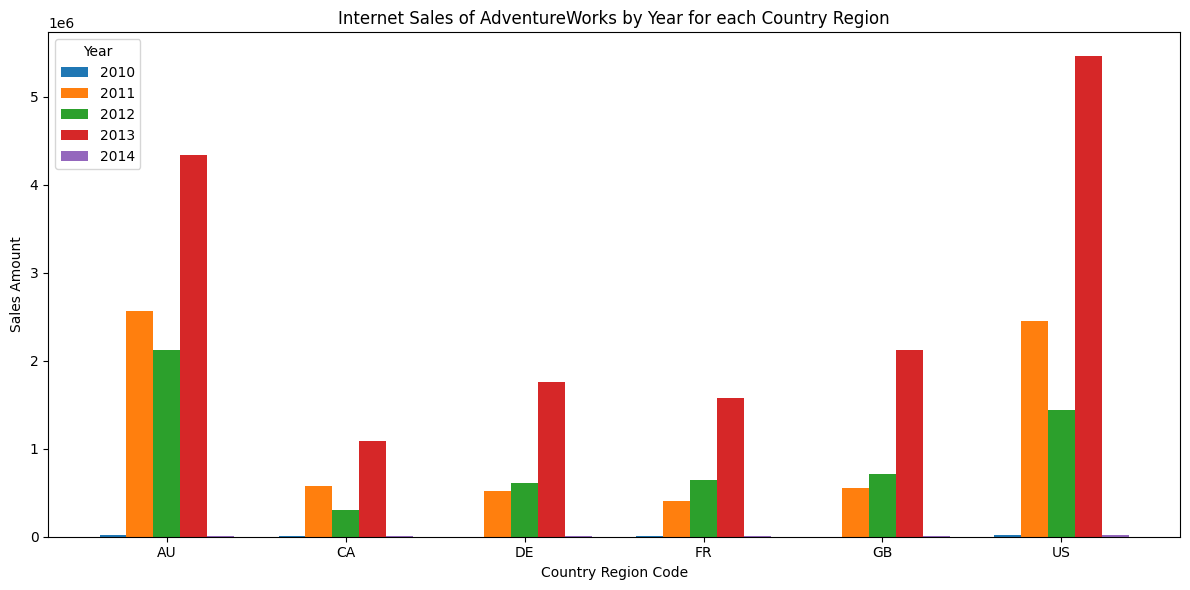

In [ ]:
# Visualize in Bar Chart to show Internet sales of AdventureWorks by year for each Country Region
import matplotlib.pyplot as plt
import seaborn as sns

country_rgcd = pivot_table.index
years = pivot_table.columns
data = pivot_table.values.T
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.15
index = range(len(country_rgcd))
for i, year in enumerate(years):
    plt.bar([x + i * bar_width for x in index], data[i], bar_width, label=str(year))

plt.xlabel('Country Region Code')
plt.ylabel('Sales Amount')
plt.title('Internet Sales of AdventureWorks by Year for each Country Region')
plt.xticks([x + (len(years) - 1) * bar_width / 2 for x in index], country_rgcd)
plt.legend(title='Year')

plt.tight_layout()
plt.show()

2. Generate summary statistics including min, max, and standard deviation for Yearly Income, Gender by Country Regions.  

In [ ]:
# Create a copy of the original dataframe before making modifications
modi_dt2 = OG_dt.copy()
summary_statistics = modi_dt2.groupby(['CountryRegionCode', 'Gender'])['YearlyIncome'].agg(['min', 'max', 'std'])
summary_statistics = summary_statistics.reset_index()

summary_statistics = summary_statistics.rename(columns={
    'min': 'Minimum Yearly Income',
    'max': 'Maximum Yearly Income',
    'std': 'Standard Deviation of Yearly Income'
})

# Create another pivot table to better organize the grouped data statistics
pivot_table2 = summary_statistics.pivot(index='CountryRegionCode', columns='Gender')

print(pivot_table2)

                  Minimum Yearly Income        Maximum Yearly Income          \
Gender                                F      M                     F       M   
CountryRegionCode                                                              
AU                                10000  10000                160000  170000   
CA                                10000  10000                170000  170000   
DE                                10000  10000                130000  130000   
FR                                10000  10000                110000  110000   
GB                                10000  10000                170000  170000   
US                                10000  10000                170000  170000   

                  Standard Deviation of Yearly Income          
Gender                                              F       M  
CountryRegionCode                                              
AU                                            30614.0 32550.8  
CA                     

3. What is the average price of the product category that generates the most sales?

In [ ]:
# Create a copy of the original dataframe before making modifications
modi_dt3 = OG_dt.copy()
category_sales = modi_dt3.groupby('EnglishProductName')['SalesAmount'].sum()

# Highest total sales category
higest_sales_category = category_sales.idxmax()
higest_sales_category_dt = modi_dt3[modi_dt3['EnglishProductName'] == higest_sales_category]

# Average price of the product category that generates the most sales
avgprice_higest_sales_category = higest_sales_category_dt['UnitPrice'].mean()

print(higest_sales_category,avgprice_higest_sales_category)
# Answer in organized sentence
print(f"The average price of product category with most sales '{higest_sales_category}' is ${avgprice_higest_sales_category:.2f}")

Mountain-200 Black, 46 2215.27346483871
The average price of product category with most sales 'Mountain-200 Black, 46' is $2215.27


4. Does owning a home make a difference in sales? Explain your analysis.

In [ ]:
# Create a copy of the original dataframe before making modifications
modi_dt4 = OG_dt.copy()

# Group the data by whether the customer owns a house and calculate the sum of their Sales Amount
summary = modi_dt4.groupby('HouseOwnerFlag')['SalesAmount'].sum()
summary_df = summary.reset_index()
summary_df = summary_df.rename(columns={'SalesAmount': 'Total Sales Amount'})
pd.set_option('display.float_format', '{:.1f}'.format) # Showing the numbers in its full ratehr than in exponential notation

#Display the summary without showing the default index number
print(summary_df.to_string(index=False))

 HouseOwnerFlag  Total Sales Amount
              0           8973327.4
              1          20385349.8


In [ ]:
# Create a copy of the original dataframe before making modifications
modi_dt5 = OG_dt.copy()

# Group the data by both 'Gender' and 'MaritalStatus' and calculate various summary statistics for 'Sales'
summary = modi_dt5.groupby(['HouseOwnerFlag', 'Gender', 'MaritalStatus'])['SalesAmount'].agg(['mean', 'count', 'sum'])

# Convert the summary to a DataFrame for a more organized format
summary_df = summary.reset_index()

# Rename the columns for clarity
summary_df = summary_df.rename(columns={
    'mean': 'Mean Sales',
    'count': 'Sales Count',
    'sum': 'Total Sales'
})

# Display the summary
print(summary_df.to_string(index=False))

 HouseOwnerFlag Gender MaritalStatus  Mean Sales  Sales Count  Total Sales
              0      F             M       425.4         2590    1101745.5
              0      F             S       529.1         6478    3427771.1
              0      M             M       407.7         3390    1382091.5
              0      M             S       490.6         6241    3061719.3
              1      F             M       467.8        13180    6165272.9
              1      F             S       530.2         7769    4118829.2
              1      M             M       463.3        14113    6538265.9
              1      M             S       536.8         6637    3562981.9


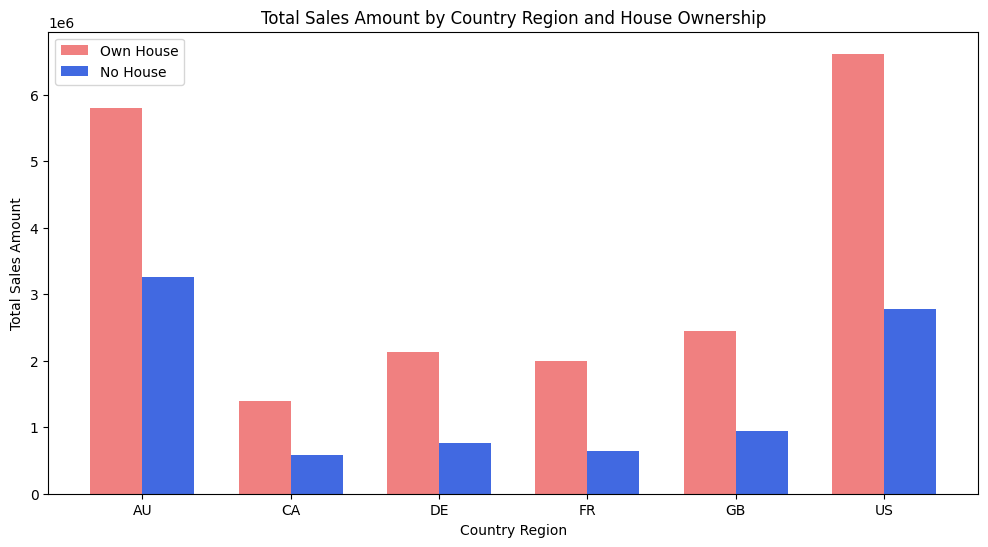

In [ ]:
# Create a copy of the original dataframe before making modifications
modi_dt6 = OG_dt.copy()

summary = modi_dt6.groupby(['CountryRegionCode', 'HouseOwnerFlag'])['SalesAmount'].sum()
summary_df = summary.reset_index()

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))

unique_regions = summary_df['CountryRegionCode'].unique()
x = np.arange(len(unique_regions))

bar_width = 0.35
bar_positions_House = x - bar_width/2
bar_positions_NoHouse = x + bar_width/2

House_sales = summary_df[summary_df['HouseOwnerFlag'] == 1]['SalesAmount']
NoHouse_sales = summary_df[summary_df['HouseOwnerFlag'] == 0]['SalesAmount']

plt.bar(bar_positions_House, House_sales, bar_width, label='Own House', color='lightcoral')
plt.bar(bar_positions_NoHouse, NoHouse_sales, bar_width, label='No House', color='royalblue')

plt.xlabel('Country Region')
plt.ylabel('Total Sales Amount')
plt.title('Total Sales Amount by Country Region and House Ownership')
plt.xticks(x, unique_regions)
plt.legend()

plt.show()